In [76]:
import pandas as pd
import numpy as np

In [77]:
random_state = 17

I will use Heart Failure Prediction Dataset from https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [78]:
df = pd.read_csv("data/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Check is data are complete

In [79]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Check unique values in each column

In [80]:
df.apply(lambda col: col.unique())

Age               [40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 6...
Sex                                                          [M, F]
ChestPainType                                   [ATA, NAP, ASY, TA]
RestingBP         [140, 160, 130, 138, 150, 120, 110, 136, 115, ...
Cholesterol       [289, 180, 283, 214, 195, 339, 237, 208, 207, ...
FastingBS                                                    [0, 1]
RestingECG                                        [Normal, ST, LVH]
MaxHR             [172, 156, 98, 108, 122, 170, 142, 130, 120, 9...
ExerciseAngina                                               [N, Y]
Oldpeak           [0.0, 1.0, 1.5, 2.0, 3.0, 4.0, 0.5, 2.5, 5.0, ...
ST_Slope                                           [Up, Flat, Down]
HeartDisease                                                 [0, 1]
dtype: object

Convert categorical vars to indicator vars

In [81]:
flat_df = pd.get_dummies(df)
flat_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


Split to train test

In [82]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(flat_df, test_size=0.1, random_state=random_state)

In [83]:
len(test)

92

In [84]:
train_X = train.drop(columns=["HeartDisease"])
train_Y = train["HeartDisease"]
test_X = test.drop(columns=["HeartDisease"])
test_Y = test["HeartDisease"]

Let's train catboost classifier

In [85]:
!pip install catboost

You should consider upgrading via the '/home/dmitrypogrebnoy/Desktop/AdvancedML_ITMO_Cource_2/venv/bin/python -m pip install --upgrade pip' command.


In [86]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=7,
    learning_rate=0.5
)


clf.fit(train_X, train_Y,
        eval_set=(test_X, test_Y),
        plot=True
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.4402119	test: 0.4652453	best: 0.4652453 (0)	total: 1.35ms	remaining: 8.13ms
1:	learn: 0.3442396	test: 0.4194892	best: 0.4194892 (1)	total: 3.19ms	remaining: 7.96ms
2:	learn: 0.2995047	test: 0.3954078	best: 0.3954078 (2)	total: 4.16ms	remaining: 5.55ms
3:	learn: 0.2634190	test: 0.3901437	best: 0.3901437 (3)	total: 5.5ms	remaining: 4.12ms
4:	learn: 0.2449373	test: 0.3862355	best: 0.3862355 (4)	total: 6.61ms	remaining: 2.64ms
5:	learn: 0.2366249	test: 0.3863949	best: 0.3862355 (4)	total: 7.72ms	remaining: 1.29ms
6:	learn: 0.2203377	test: 0.3902015	best: 0.3862355 (4)	total: 8.85ms	remaining: 0us

bestTest = 0.3862354535
bestIteration = 4

Shrink model to first 5 iterations.
CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 7, 'learning_rate': 0.5}


Now we have trained model, and it's time to evaluate it using different techs

In [87]:
!pip install eli5

You should consider upgrading via the '/home/dmitrypogrebnoy/Desktop/AdvancedML_ITMO_Cource_2/venv/bin/python -m pip install --upgrade pip' command.


First try to use eli5 lib to show some model internals and try to interpret it

Show feature importance

In [88]:
import eli5
eli5.explain_weights_catboost(clf)

Weight,Feature
0.1294,Cholesterol
0.1227,Oldpeak
0.0978,Age
0.0913,ChestPainType_ASY
0.0777,ExerciseAngina_N
0.0721,ChestPainType_ATA
0.0673,ST_Slope_Flat
0.0602,Sex_M
0.0583,FastingBS
0.0542,RestingECG_LVH


As we can see the most valuable features is Cholesterol, Oldpeak and, of course, Age. Also, the presence/absence of exercise angina and the type of chest pain noticeable affect the prediction.

Check permutation importance

In [89]:
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(clf, scoring="balanced_accuracy")
perm.fit(test_X, test_Y)
eli5.show_weights(perm, feature_names=test_X.columns.to_numpy())

Weight,Feature
0.0449 ± 0.0285,ST_Slope_Flat
0.0436 ± 0.0225,Cholesterol
0.0339 ± 0.0248,ST_Slope_Up
0.0326 ± 0.0195,ChestPainType_ATA
0.0292 ± 0.0398,ChestPainType_ASY
0.0186 ± 0.0091,Sex_M
0.0061 ± 0.0218,ExerciseAngina_Y
0.0055 ± 0.0105,ExerciseAngina_N
0.0021 ± 0.0156,FastingBS
0.0006 ± 0.0138,RestingBP


Here we can see that there are different features in the top. So the most important things are ST_Slope value, Cholesterol and ChestPainType. But Age is not so important.

Let's use SHAP tech to discover more internals

In [90]:
!pip install shap

You should consider upgrading via the '/home/dmitrypogrebnoy/Desktop/AdvancedML_ITMO_Cource_2/venv/bin/python -m pip install --upgrade pip' command.


In [91]:
import shap

shap.initjs()

In [92]:
X = flat_df.drop(columns=["HeartDisease"])
Y = flat_df["HeartDisease"]

In [106]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X)

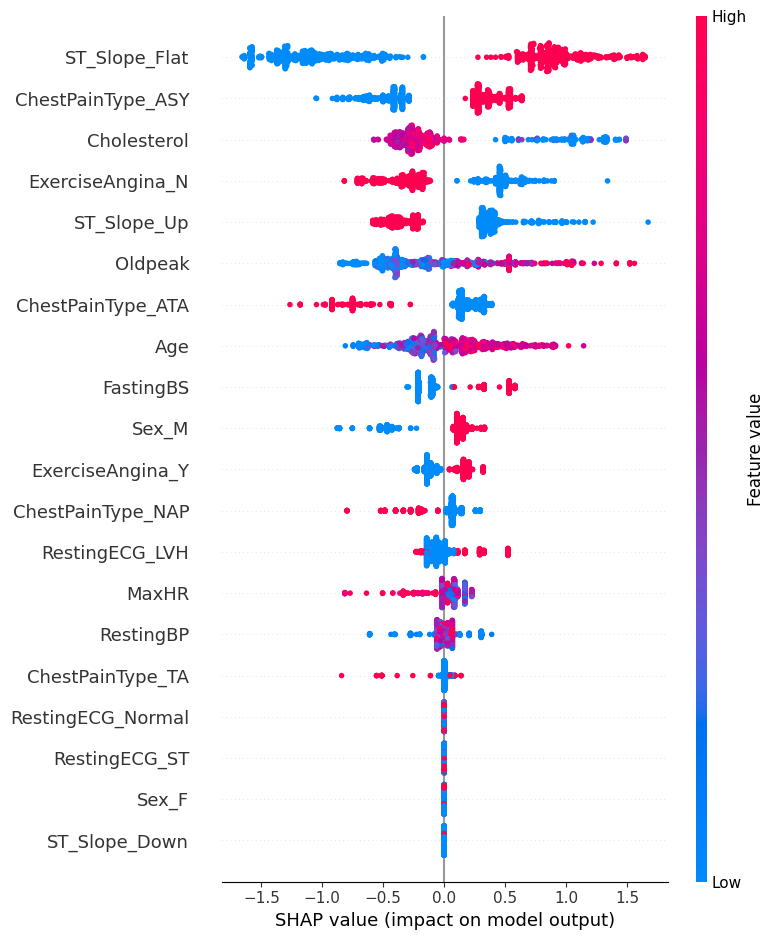

In [107]:
shap.summary_plot(shap_values, X)

As we can see the ST_Slope state, ChestPainType, Oldpeak and Cholesterol makes most impact. But Age and MaxHR almost non-impactfull

In [109]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

The same as in the previous graph

In [123]:
clf.predict(X.values[0])

0

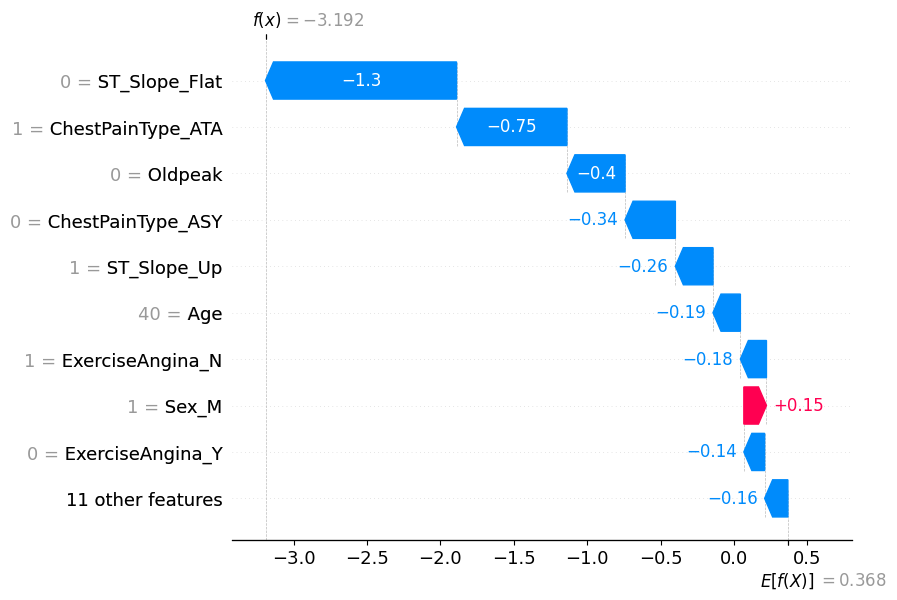

In [114]:
waterfall_shap_values = explainer(X)
shap.plots.waterfall(waterfall_shap_values[0,:])

Here is a well-known most impact features ST_Slope state, ChestPainType, Oldpeak

ST_Slope_Flat = 0 and ChestPainType_ATA = 0 highly reduce chance to get heart failure

Let's see on PDP plots

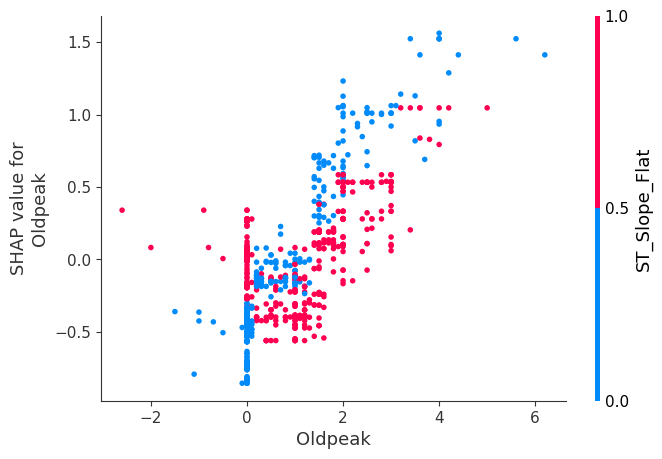

In [119]:
shap.dependence_plot("Oldpeak", shap_values, X)

We can see that higher oldpeak has most impact then low impact.
The same Oldpeak value with ST_Slope_Flat=1 will have less SHAP value then with ST_Slope_Flat=0

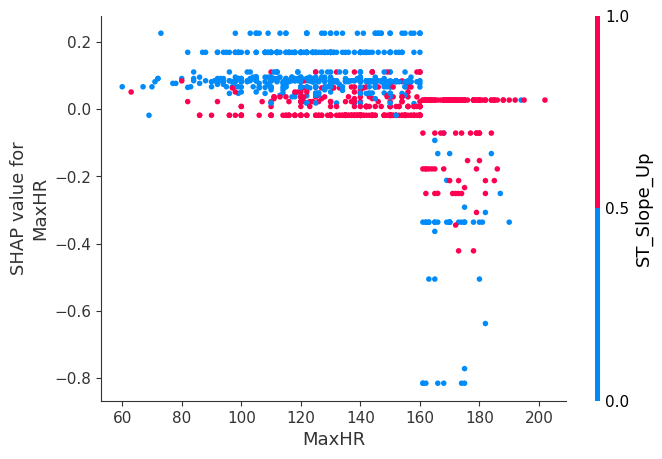

In [121]:
shap.dependence_plot("MaxHR", shap_values, X)


MaxHR will have lower SHAP value if ST_Slope = UP and the higher SHAP value if ST_Slope != UP

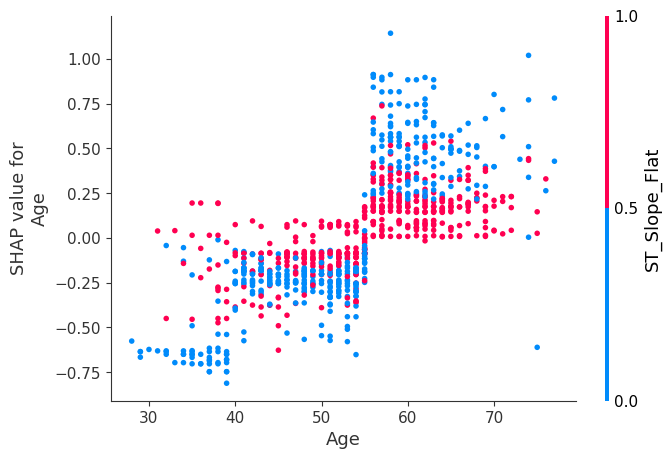

In [122]:
shap.dependence_plot("Age", shap_values, X)

Age will have lower (abs) SHAP value if ST_Slope = Flat and the higher (abs) SHAP value if ST_Slope != Flat


And now let's use LIME lib

In [97]:
!pip install lime

You should consider upgrading via the '/home/dmitrypogrebnoy/Desktop/AdvancedML_ITMO_Cource_2/venv/bin/python -m pip install --upgrade pip' command.


In [98]:
import lime

In [99]:
def c_run_pred(x):
    p = clf.predict_proba(x)
    return p

c_predict_fn = lambda x: c_run_pred(x)

In [100]:
explainer = lime.lime_tabular.LimeTabularExplainer(train_X.values,
                                                   feature_names=X.columns,
                                                   class_names=[0, 1],
                                                   discretize_continuous=True)

In [101]:
clf.predict_proba(test_X.values[10])

array([0.12377701, 0.87622299])

In [102]:
exp = explainer.explain_instance(test_X.values[10], c_predict_fn)
exp.show_in_notebook(show_table=True, show_all=False)

So the most impactfull features ST_Slope, ChestPainType and ExerciseAngina. And this person will probably face with heart failure.

# Conclusion

Several techniques were applied to obtain interpretations of the model's performance and predictions. The values of ST_Slope, ChestPainType, Cholesterol, and ExerciseAngina have the greatest influence on the results. The remaining features have much less influence. In addition, some dependency graphs were examined and a conclusion was made for each graph.